In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/data.csv")
df.shape

(100, 5)

In [4]:
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
questionnaire score(EQ),148,131,126,135,132
gradeof software,19,17,16,17,16
grade of questionnaire score(EQ),5,4,3,4,4


In [5]:
df.drop(["gradeof software"],axis=1, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
questionnaire score(EQ),148,131,126,135,132
grade of questionnaire score(EQ),5,4,3,4,4


In [6]:
df.rename(columns={"questionnaire score(EQ)":"EQ","grade of questionnaire score(EQ)":"target"}, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
EQ,148,131,126,135,132
target,5,4,3,4,4


In [7]:
X = df.drop("target", axis = 1)
y = df["target"]

In [8]:
X.shape

(100, 3)

In [9]:
y.shape

(100,)

In [11]:
X.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
EQ,148,131,126,135,132


____

## XGBoost - StandardScaler

In [12]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [14]:
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.25, random_state=42)
X_sc_train.shape, y_train.shape, X_sc_test.shape, y_test.shape

((75, 3), (75,), (25, 3), (25,))

In [15]:
model= xgb.XGBClassifier()
model.fit(X_sc_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [16]:
y_pred = model.predict(X_sc_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[6 0 0 0 0]
 [0 1 0 0 0]
 [0 0 9 0 0]
 [0 0 0 7 0]
 [0 0 0 0 2]]
1.0


___
## XGBoost Classifier

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((75, 3), (75,), (25, 3), (25,))

In [18]:
model= xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [19]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[6 0 0 0 0]
 [0 1 0 0 0]
 [0 0 9 0 0]
 [0 0 0 7 0]
 [0 0 0 0 2]]
1.0


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



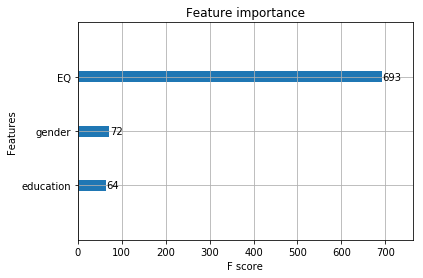

In [21]:
model_importances = XGBClassifier(n_estimators=200)
model_importances.fit(X_train, y_train)
plot_importance(model_importances)
plt.show()

In [22]:
print('The accuracy of the xgb classifier is {:.4f} on training data'.format(model.score(X_train, y_train)))
print('The accuracy of the xgb classifier is {:.4f} on test data'.format(model.score(X_test, y_test)))

The accuracy of the xgb classifier is 1.0000 on training data
The accuracy of the xgb classifier is 1.0000 on test data


Text(0.5,15,'Predicted label')

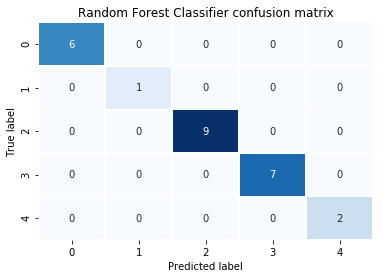

In [26]:
cfm = confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None, cmap="Blues")
plt.title('Random Forest Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')